In [12]:
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
with open('preprocessed_data.pickle', 'rb') as fr:
    data = pickle.load(fr)

In [3]:
data.keys()

dict_keys(['train_x', 'train_y', 'test_x', 'test_y', 'validation_x', 'validation_y', 'token', 'sentence_len', 'stop_words', 'word_num'])

In [4]:
t_x = data['train_x']
t_y = data['train_y']
tt_x = data['test_x']
tt_y = data['test_y']
v_x = data['validation_x']
v_y = data['validation_y']
sentence_len = data['sentence_len']

In [5]:
t_x.shape, v_x.shape, tt_x.shape, t_y.shape, v_y.shape, tt_y.shape

((5447, 51), (1353, 51), (2920, 51), (5447, 5), (1353, 5), (2920, 5))

In [6]:
batch_size = 128
ec = 50
embedding_len = 64
neuron_num = 64
d_out = 0.3
lr = 0.001

In [7]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, restore_best_weights = True)
mck = ModelCheckpoint('best_m.h5', monitor = 'accuracy', mode = 'max', save_best_only = True)

In [8]:
m = Sequential()
m.add(Embedding(2036, embedding_len, input_length = sentence_len))
m.add(Bidirectional(LSTM(neuron_num * 2, dropout = d_out, return_sequences = True)))
m.add(Bidirectional(LSTM(neuron_num, dropout = d_out)))
m.add(Dense(neuron_num * 2, activation = 'relu'))
m.add(Dropout(d_out))
m.add(Dense(neuron_num, activation = 'relu'))
m.add(Dropout(d_out))
m.add(Dense(5, activation = 'sigmoid'))
m.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [9]:
hy = m.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [es, mck])

Epoch 1/50
43/43 [==============================] - 29s 535ms/step - loss: 0.1929 - accuracy: 0.9640 - val_loss: 0.0683 - val_accuracy: 0.9993
Epoch 2/50
43/43 [==============================] - 22s 504ms/step - loss: 0.0821 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9993
Epoch 3/50
43/43 [==============================] - 23s 530ms/step - loss: 0.0790 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9993
Epoch 4/50
43/43 [==============================] - 22s 517ms/step - loss: 0.0773 - accuracy: 1.0000 - val_loss: 0.0685 - val_accuracy: 0.9993


In [10]:
m.evaluate(tt_x, tt_y)

92/92 [==============================] - 4s 46ms/step - loss: 0.0606 - accuracy: 1.0000


[0.06061762943863869, 1.0]

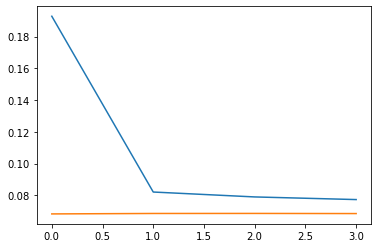

In [13]:
plt.plot(hy.history['loss'], label = 'loss')
plt.plot(hy.history['val_loss'], label = 'val_loss')
plt.show()